In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
gameweek = pd.read_csv('../Fantasy-Premier-League/data/2021-22/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme


In [3]:
gameweek.sample(5,random_state=0)
columns = gameweek.columns

# If you play then your shape elo is afeected, I think that is only fair to update palyer elo.
#Last game played using kickoff time
# print(gameweek.shape)

Some features that need to be created: 
- elo based on a player which only updates if player was involved in a game : temporal
- played or not played indicator.
- last time a player was involved : temporal debateable at the moment if this will add any value.
- Home and Away indicator : Completed
- position catergorical variables update [0,0,0] = keeper [0,0,1] = defender [0,1,0] = midfielder [1,0,0] = forward :Completed
- 

In [4]:
gameweek.query("position == 'FWD' & round == 9") # I like this very much easier to read


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
4744,Keinan Davis,FWD,Aston Villa,-0.1,0,0,0,0,0.0,49,81,0,0,0.0,0.0,2021-10-22T19:00:00Z,0,1,0,0,0,0,9,0,149750,1,3,0.0,0,17809,30650,12841,44,False,0,9
4750,Moise Kean,FWD,Everton,0.0,0,0,0,0,0.0,564,86,0,0,0.0,0.0,2021-10-23T14:00:00Z,0,18,0,0,0,0,9,0,1233,5,2,0.0,0,-24,0,24,60,True,0,9
4760,Joshua King,FWD,Watford,4.5,0,3,72,0,12.9,468,86,2,3,24.1,106.4,2021-10-23T14:00:00Z,90,8,0,0,0,0,9,0,55745,5,2,122.0,16,-6047,3096,9143,55,False,1,9
4761,Richarlison de Andrade,FWD,Everton,2.0,0,0,25,0,14.5,180,86,4,1,7.7,39.2,2021-10-23T14:00:00Z,30,18,0,0,0,0,9,0,338072,5,2,23.0,4,412,16894,16482,74,True,1,9
4774,Armando Broja,FWD,Southampton,4.7,0,2,28,0,1.2,518,89,2,1,7.6,33.6,2021-10-23T14:00:00Z,78,5,0,0,0,0,9,0,101480,2,2,41.0,8,50958,57469,6511,50,True,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,Juan Camilo Hernández Suárez,FWD,Watford,0.8,1,0,22,0,61.5,472,86,2,0,12.2,27.2,2021-10-23T14:00:00Z,90,8,0,0,0,0,9,0,130577,5,2,33.0,5,-6546,3821,10367,50,False,0,9
5306,Daniel N'Lundulu,FWD,Southampton,0.0,0,0,0,0,0.0,344,89,0,0,0.0,0.0,2021-10-23T14:00:00Z,0,5,0,0,0,0,9,0,1384,2,2,0.0,0,-35,0,35,45,True,0,9
5342,Halil Dervişoğlu,FWD,Brentford,0.0,0,0,0,0,0.0,95,82,0,0,0.0,0.0,2021-10-24T13:00:00Z,0,9,0,0,0,0,9,0,1320,2,1,0.0,0,-50,0,50,54,True,0,9
5347,Jordan Hugill,FWD,Norwich,0.0,0,0,0,0,0.0,322,84,0,0,0.0,0.0,2021-10-23T11:30:00Z,0,6,0,0,0,0,9,0,973,0,7,0.0,0,-41,0,41,54,False,0,9


In [57]:

# home and away indicator

gameweek['was_home_ind'] =gameweek['was_home'].replace({True: 1, False: 0})
gameweek


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,was_home_ind
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1,0
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1,0
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38,1
24561,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38,0
24562,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38,0
24563,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38,1


PD

In [58]:


# position = pd.Series(['GK','DEF','MID','FWD'])


position = pd.get_dummies(gameweek,columns=['position'])
position


,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,was_home_ind,position_DEF,position_FWD,position_GK,position_MID
0,Eric Bailly,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1,1,1,0,0,0
1,Keinan Davis,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1,0,0,1,0,0
2,Ayotomiwa Dele-Bashiru,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1,1,0,0,0,1
3,James Ward-Prowse,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1,0,0,0,0,1
4,Bruno Miguel Borges Fernandes,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38,1,0,0,0,1
24561,Matt Ritchie,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38,0,1,0,0,0
24562,Nathan Redmond,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38,0,0,0,0,1
24563,Mathew Ryan,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38,1,0,0,1,0


In [61]:
# we are trying to self merge the table 

# gameweek.merge(right=gameweek, how='left',on='name') 
# gameweek is too big a file to do all these things

columns = []

temporal = gameweek.merge(right=gameweek, how='left',on='name',suffixes=['','_lag']) 



In [62]:
# okay lets start with some pivot tabels
series_temp =temporal[['round','round_lag']]
series_temp['lag'] = series_temp['round']-series_temp['round_lag']

/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_75384/1272843087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_temp['lag'] = series_temp['round']-series_temp['round_lag']


Create Violin plot of player performance over the course of the seasom

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:


gameweek.columns


Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'was_home_ind'],
      dtype='object')

In [136]:

#We need players to know if there are active minutes played
def playtime(row):
    #we want player with real game time
    if row <5:
            result = 0
    else:
            result = 1
    return result

trendviolin = (gameweek[['position','was_home','round','kickoff_time','minutes','name','total_points','value','team']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)                

In [67]:
trendviolin.query("minutes > 0")  #query("position == 'DEF'")

,position,was_home,round,kickoff_time,minutes,name,total_points,value,was_home_ind,playtime
3,MID,False,1,2021-08-14T14:00:00Z,90,James Ward-Prowse,2,65,0,1
4,MID,True,1,2021-08-14T11:30:00Z,90,Bruno Miguel Borges Fernandes,20,120,1,1
6,MID,False,1,2021-08-14T14:00:00Z,90,James McArthur,2,45,0,1
9,MID,False,1,2021-08-14T14:00:00Z,76,Jairo Riedewald,2,50,0,1
10,MID,False,1,2021-08-14T14:00:00Z,14,Alexis Mac Allister,9,55,0,1
...,...,...,...,...,...,...,...,...,...,...
24555,GK,False,38,2022-05-22T15:00:00Z,45,John Ruddy,1,43,0,1
24557,DEF,False,38,2022-05-22T15:00:00Z,90,Mohammed Salisu,0,45,0,1
24558,MID,True,38,2022-05-22T15:00:00Z,90,N'Golo Kanté,2,49,1,1
24561,DEF,False,38,2022-05-22T15:00:00Z,1,Matt Ritchie,1,49,0,0


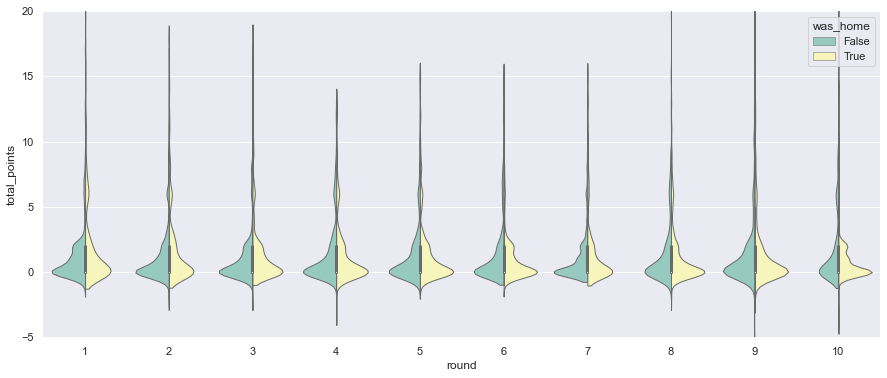

In [68]:
#Setting up the plot

f, ax = plt.subplots(figsize=(15,6))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home']].query(" round <11")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1)

# Finalize the figure
ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

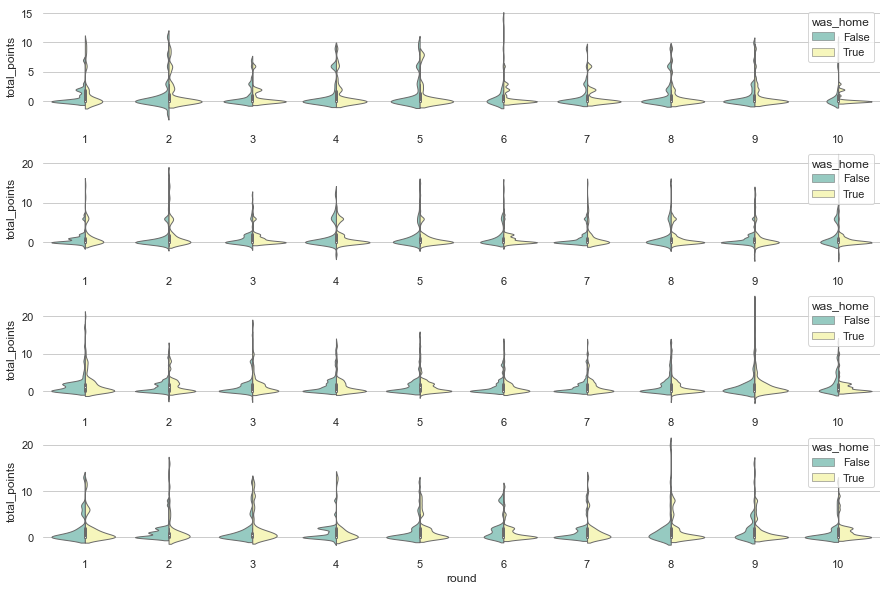

In [92]:
# create subplots of every position

f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

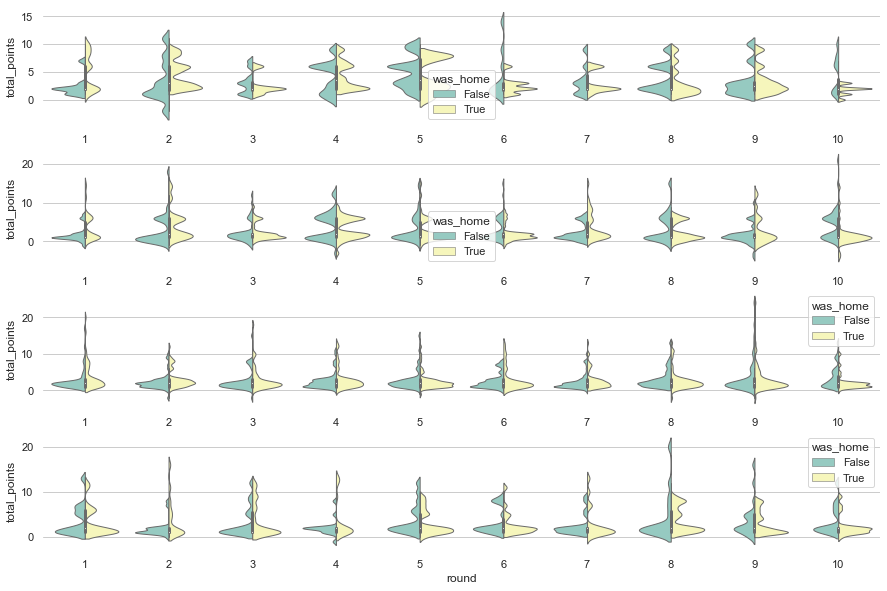

In [93]:
#with playtime minutes


f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)


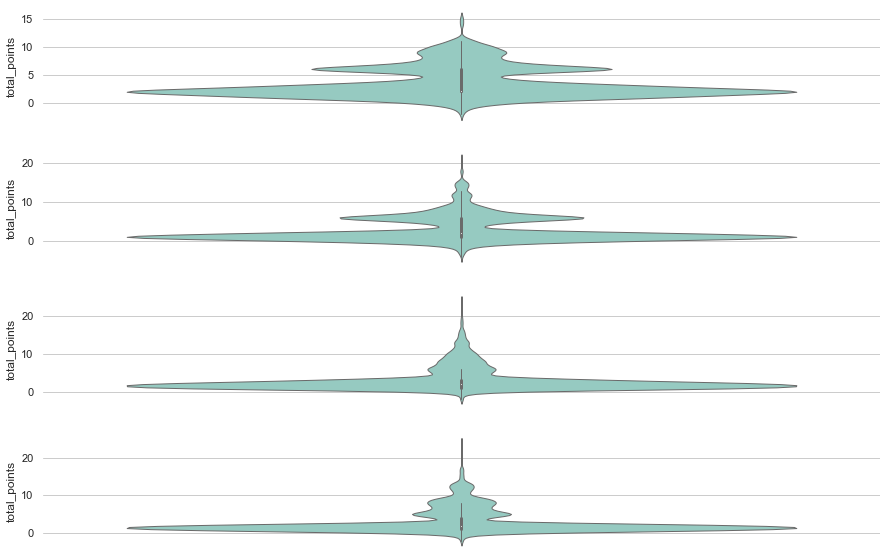

In [95]:
# lets look at overall peformance over the season

f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query("  position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)



In [ ]:

pd.pivot_table(trendviolin,
                    values='total_points',
                    index='position',
                    columns=['round'])

In [88]:
#new models to try
trendviolin = (gameweek[['position','was_home','round','kickoff_time','minutes','name','total_points','transfers_balance','transfers_in', 'transfers_out' ,'value']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin.sample(5)

,position,was_home,round,kickoff_time,minutes,name,total_points,transfers_balance,transfers_in,transfers_out,value,was_home_ind
928,MID,False,2,2021-08-23T19:00:00Z,80,James Maddison,2,-240085,11507,251592,69,0
21411,MID,False,34,2022-04-23T14:00:00Z,74,Imrân Louza,2,1,80,79,52,0
4007,DEF,False,7,2021-10-02T11:30:00Z,0,Jonjoe Kenny,0,-273,317,590,45,0
9969,MID,False,17,2021-12-14T19:45:00Z,0,Morgan Sanson,0,8,87,79,50,0
22826,MID,False,36,2022-05-11T18:45:00Z,0,Onel Hernández,0,-2,0,2,49,0


<AxesSubplot:xlabel='round', ylabel='transfers_balance'>

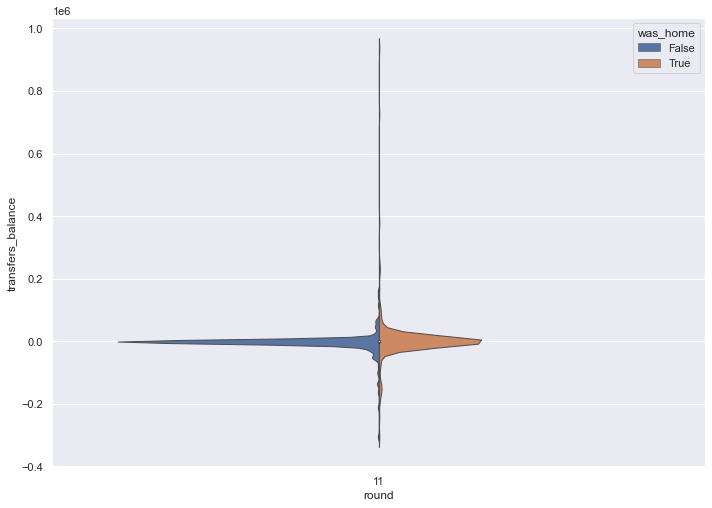

In [50]:



sns.violinplot( x="round"
                , y="transfers_balance"
                ,hue='was_home'
                , data=trendviolin.query(" round ==11")
                # , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                )


<AxesSubplot:xlabel='position', ylabel='transfers_out'>

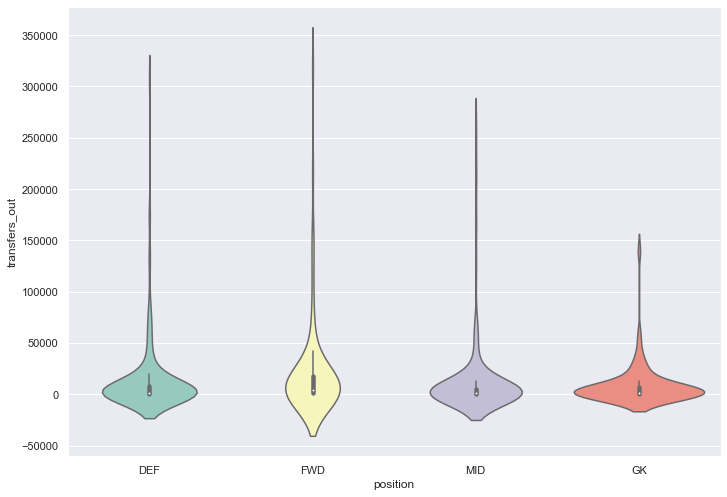

In [41]:

sns.violinplot( x="position"
                , y="transfers_out"
                #,hue='was_home'
                , data=trendviolin.query(" round ==11")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                )


<AxesSubplot:xlabel='position', ylabel='value'>

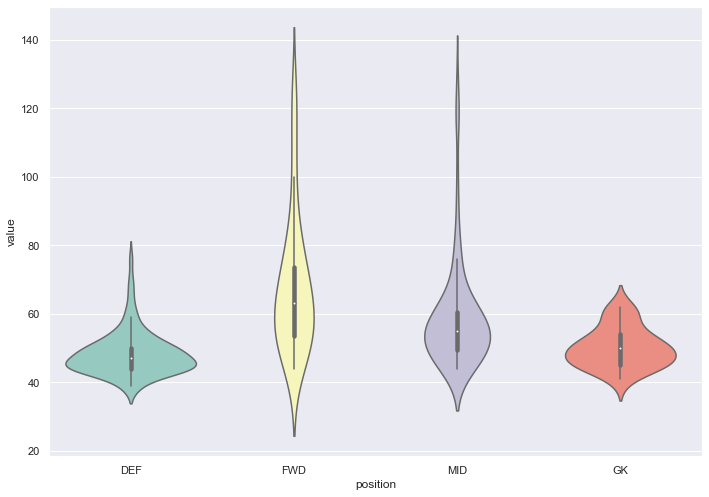

In [69]:
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)       
sns.violinplot( x="position"
                , y="value"
                #,hue='was_home'
                , data=trendviolin.query(" round ==11 & playtime >0")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                )

<AxesSubplot:xlabel='value', ylabel='total_points'>

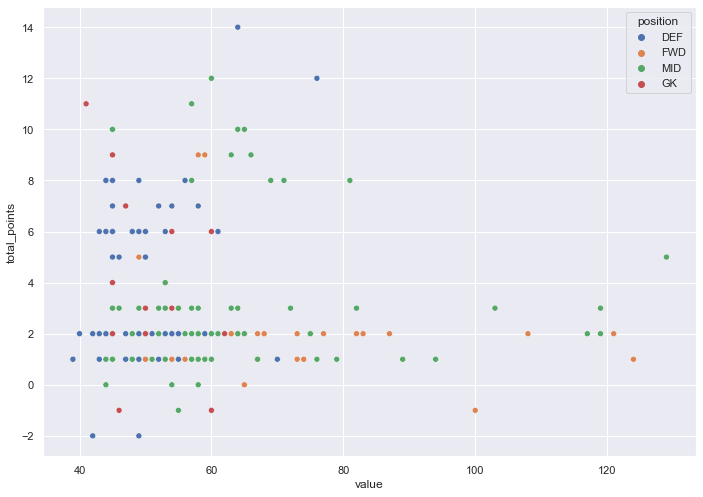

In [75]:
# lets do a scatterplot of value and points

sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==11 & playtime >0")
                ,)


In [77]:
#last week performance of players who balled

newgame_df = pd.read_csv("Fantasy-Premier-League/data/2022-23/gws/gw1.csv")
newgame_df.sample(5)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
29,Cristiano Ronaldo dos Santos Aveiro,FWD,Man Utd,4.1,0,0,3,0,11.5,326,9,0,0,3.6,4.6,2022-08-07T13:00:00Z,37,5,0,0,0,0,1,0,352984,2,1,20.0,1,0,0,0,105,True,0
227,Thiago Alcántara do Nascimento,MID,Liverpool,3.5,0,0,8,0,16.8,277,4,1,0,2.3,6.4,2022-08-06T11:30:00Z,50,9,0,0,0,0,1,0,175766,2,2,0.0,1,0,0,0,55,False,0
85,Jack Stacey,DEF,Bournemouth,1.4,0,0,0,0,0.0,65,2,0,0,0.0,0.0,2022-08-06T14:00:00Z,0,2,0,0,0,0,1,0,4613,0,2,0.0,0,0,0,0,45,True,0
365,Lewis O'Brien,MID,Nott'm Forest,1.1,0,0,7,0,0.8,524,7,1,0,2.1,12.4,2022-08-06T14:00:00Z,74,15,0,0,0,0,1,0,4256,0,2,8.0,1,0,0,0,50,False,1
544,Romain Perraud,DEF,Southampton,1.4,0,0,2,0,1.0,417,8,0,0,2.5,0.0,2022-08-06T14:00:00Z,18,18,0,0,0,0,1,0,3733,1,4,24.0,1,0,0,0,45,False,0


<AxesSubplot:xlabel='value', ylabel='total_points'>

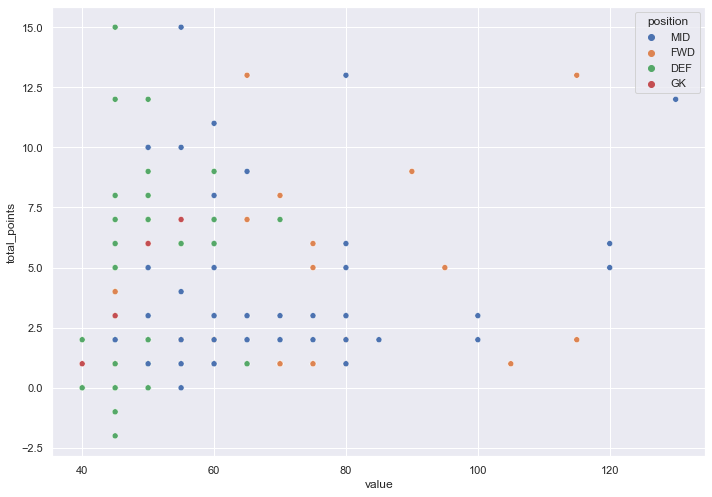

In [81]:


sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=newgame_df.query("round ==1 & minutes >0")
                ,)

<AxesSubplot:xlabel='total_points', ylabel='Density'>

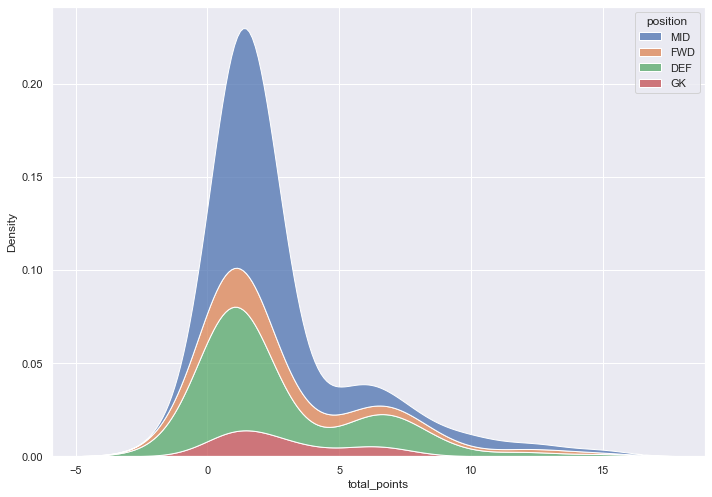

In [84]:
sns.kdeplot(data=newgame_df.query("minutes > 0"), x="total_points", hue='position',multiple='stack')

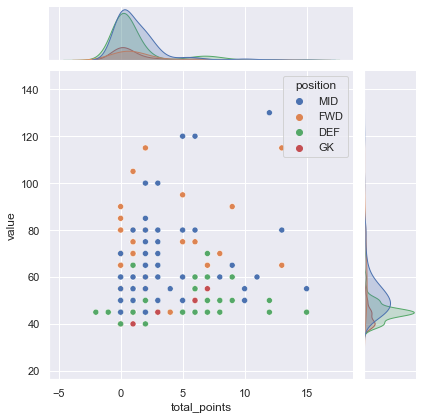

In [85]:
sns.jointplot(data=newgame_df, 
            x="total_points",
            y="value",
            hue="position")

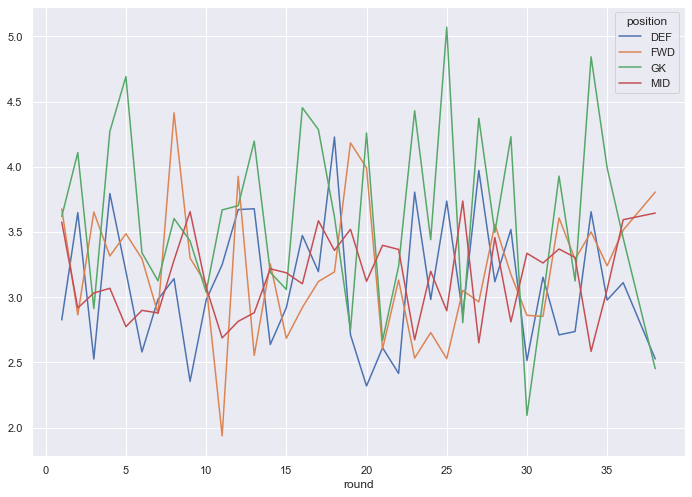

In [134]:
# attempt at plotting a weighted mean function


# trendviolin["value_and_points"] = zip(trendviolin.value, trendviolin.total_points)

# trendviolin["value_and_points"] = trendviolin.value * trendviolin.total_points
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()


w_test =(trendviolin
.query("minutes > 0")
# .query("was_home == False")
.assign(value_and_point = trendviolin['value']*trendviolin['total_points'])
.groupby(['round','position'])
.apply(w_avg,'total_points', 'value')
.unstack()
.plot()
# .mean()
#.sum(['value_and_points','value'])
)

In [124]:
w_test

round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEF,74.129702,89.851031,64.049946,94.072151,76.786297,62.991479,62.243991,77.966086,58.621217,68.014417,80.869431,87.748414,86.593821,59.710684,68.910476,80.683098,80.029249,113.817578,54.638963,50.999730,51.139185,56.757378,77.951841,63.239558,80.595048,57.556836,81.092037,63.926072,73.820226,50.084353,61.754049,54.244339,56.289182,74.968597,59.726438,65.648969,53.269428
FWD,136.599576,132.383166,165.319026,153.080679,133.464943,141.429768,120.828952,188.810368,122.311797,123.843178,64.952462,128.239668,88.241464,133.412342,95.149925,99.186070,75.376613,119.336153,167.535006,183.884153,76.818957,116.914675,83.126120,80.628308,92.005038,102.234023,111.712698,113.828478,130.068727,158.424784,91.221508,122.159653,107.417595,126.790639,114.451466,122.098021,118.141801
GK,72.681298,80.301928,52.684446,73.541346,77.101090,56.193791,50.814524,55.075598,58.036694,47.370059,56.343818,61.088813,65.790407,51.636619,48.487670,70.030866,65.067568,58.663320,42.210000,64.932064,36.322099,44.888719,59.949165,49.318603,70.225348,41.292607,57.327503,50.148046,58.775815,29.278250,41.200197,54.193664,43.579452,71.362311,57.624104,49.102013,34.507166
MID,153.544449,110.412897,112.041422,110.814663,104.908266,94.660775,107.083748,121.998131,134.606261,108.622547,86.540630,102.571954,95.830288,114.103657,111.306236,108.476618,133.409689,125.325814,131.443108,96.068872,109.157334,106.114588,73.075475,109.529646,96.507147,128.816482,78.488762,109.305076,83.964217,95.034425,103.120837,112.139587,113.157203,78.955429,90.688750,113.564021,112.296392


In [142]:
trendviolin.team.value_counts()

Watford           1627
Arsenal           1457
Everton           1388
Brighton          1326
Aston Villa       1298
Wolves            1282
Liverpool         1272
Brentford         1271
Norwich           1257
Leeds             1255
Spurs             1195
Chelsea           1153
Man City          1130
Newcastle         1127
West Ham          1118
Man Utd           1113
Leicester         1088
Crystal Palace    1086
Southampton       1064
Burnley           1058
Name: team, dtype: int64

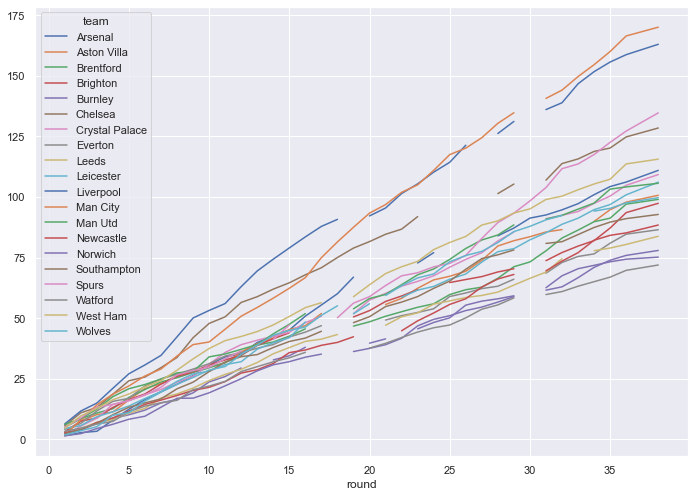

In [146]:

def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()


w_test =(trendviolin
.query("minutes > 0")
# .query("was_home == False")
.assign(value_and_point = trendviolin['value']*trendviolin['total_points'])
.groupby(['round','team'])
.apply(w_avg,'total_points', 'value')
.unstack()
.cumsum()
.plot()
# .mean()
#.sum(['value_and_points','value'])
)